In [206]:
import pandas as pd
import numpy as np

from google.colab import files
data_to_load = files.upload()

Saving Argentine real estate.csv to Argentine real estate (14).csv


In [207]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['Argentine real estate.csv']))

In [208]:
print(data.head(10))
print(data.info())

   start_date        lat        lon         l1                            l2  \
0  22/08/2020 -37.996039 -57.542509  Argentina  Buenos Aires Costa Atlántica   
1  22/08/2020 -31.380187 -58.009182  Argentina                    Entre Ríos   
2  22/08/2020 -27.494106 -55.123455  Argentina                      Misiones   
3  22/08/2020 -32.948856 -60.630464  Argentina                      Santa Fe   
4  22/08/2020 -32.884278 -60.710901  Argentina                      Santa Fe   
5  22/08/2020 -34.604195 -58.559827  Argentina      Bs.As. G.B.A. Zona Oeste   
6  22/08/2020 -32.948834 -60.630169  Argentina                      Santa Fe   
7  22/08/2020 -32.949025 -60.630468  Argentina                      Santa Fe   
8  22/08/2020 -34.439610 -58.629968  Argentina      Bs.As. G.B.A. Zona Norte   
9  22/08/2020        NaN        NaN  Argentina      Bs.As. G.B.A. Zona Norte   

                l3  rooms  bedrooms  bathrooms  surface_total  \
0    Mar del Plata      8       NaN        NaN        

In [209]:
col_to_drop = ["bedrooms", "bathrooms", "surface_total", "surface_covered"]
data.drop(columns=col_to_drop, inplace=True)
data.dropna(inplace=True)

In [210]:
print(data["operation_type"].unique())
print(data["currency"].unique())

['Alquiler' 'Alquiler temporal' 'Venta']
['ARS' 'USD']


In [211]:
sell = data["operation_type"] == "Venta"
data_sell = data[sell]

cur_ars = data_sell["currency"] == "ARS"
data_ars = data_sell[cur_ars]
data_ars["price"] = (data_ars["price"] * 0.0143).round(2) # Average exchange rate in 2020

cur_usd = data_sell["currency"].isin(["USD"])
data_usd = data_sell[cur_usd]


data_sell = pd.concat([data_usd, data_ars])
data_sell.drop(columns="currency", inplace=True)
data_sell.rename(columns={"price": "price_usd"}, inplace=True)
data_sell.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,start_date,lat,lon,l1,l2,l3,rooms,price_usd,property_type,operation_type
79,22/08/2020,-34.400162,-58.651756,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,1,132000.0,Oficina,Venta
80,22/08/2020,-34.399794,-58.650423,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3,165000.0,Oficina,Venta
81,22/08/2020,-34.614123,-58.378985,Argentina,Capital Federal,Monserrat,5,195000.0,Oficina,Venta
82,22/08/2020,-34.603233,-58.385218,Argentina,Capital Federal,San Nicolás,1,22000.0,Oficina,Venta
83,22/08/2020,-34.600004,-58.417191,Argentina,Capital Federal,Almagro,1,110000.0,Departamento,Venta


In [212]:
import plotly.express as px
import matplotlib.pyplot as plt

In [213]:
fig = px.scatter_mapbox(
    data_sell, 
    lat="lat",
    lon="lon",
    width=600, 
    height=600, 
    color="price_usd",
    hover_data=["price_usd"],
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [214]:
mean_price_by_region = data_sell.groupby("l2")["price_usd"].mean()
mean_price_by_region

l2
Bs.As. G.B.A. Zona Norte        235758.501415
Bs.As. G.B.A. Zona Oeste        142541.577413
Bs.As. G.B.A. Zona Sur          217324.764057
Buenos Aires Costa Atlántica    120786.774005
Buenos Aires Interior           112508.910891
Capital Federal                 230789.794449
Chaco                            24548.333333
Chubut                          137561.111111
Colonia                         100666.666667
Corrientes                      150000.000000
Córdoba                         215271.308844
Entre Ríos                      137946.756757
Florida                         134725.000000
Jujuy                            62500.000000
Maldonado                       488179.166667
Mendoza                          91426.304348
Michigan                         59000.000000
Misiones                        607257.640588
Montevideo                      194053.000000
Neuquén                         306120.141639
Río Negro                       190375.423077
Salta                          

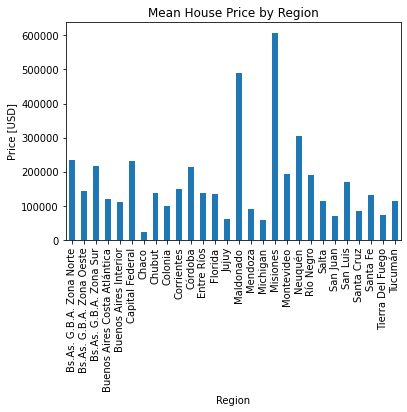

In [215]:
mean_price_by_region.plot(
    kind="bar",
    xlabel="Region",
    ylabel="Price [USD]",
    title="Mean House Price by Region"
);

In [220]:
df = data_sell[["lat", "lon", "rooms", "price_usd", "property_type"]]
df.head()

,lat,lon,rooms,price_usd,property_type
79,-34.400162,-58.651756,1,132000.0,Oficina
80,-34.399794,-58.650423,3,165000.0,Oficina
81,-34.614123,-58.378985,5,195000.0,Oficina
82,-34.603233,-58.385218,1,22000.0,Oficina
83,-34.600004,-58.417191,1,110000.0,Departamento


In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Text(0.5, 1.0, 'Price vs Rooms')

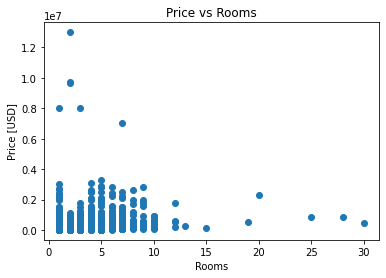

In [225]:
plt.scatter(x=df["rooms"], y=df["price_usd"])
plt.xlabel("Rooms")
plt.ylabel("Price [USD]")
plt.title("Price vs Rooms")


Text(0.5, 1.0, 'Price vs Property type')

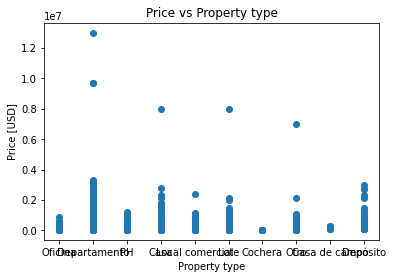

In [226]:
plt.scatter(x=df["property_type"], y=df["price_usd"])
plt.xlabel("Property type")
plt.ylabel("Price [USD]")
plt.title("Price vs Property type")

In [231]:
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    z="price_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_usd": "price"},
    width=600,
    height=500,
)

fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

fig.show()

In [227]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,lat,lon,rooms,price_usd,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
79,-34.400162,-58.651756,1,132000.0,0,0,0,0,0,0,1,0,0
80,-34.399794,-58.650423,3,165000.0,0,0,0,0,0,0,1,0,0
81,-34.614123,-58.378985,5,195000.0,0,0,0,0,0,0,1,0,0
82,-34.603233,-58.385218,1,22000.0,0,0,0,0,0,0,1,0,0
83,-34.600004,-58.417191,1,110000.0,0,0,1,0,0,0,0,0,0


In [228]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(["price_usd"])], df["price_usd"], test_size=0.2, random_state=100)
print(len(y_test))
print(len(y_train))

1407
5624


In [229]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[  1685.12015224  10017.37743593 -15291.91746585 -46284.33586986
  17672.99959961 634985.70940477 138317.35388049 166059.03642585
  16803.8685801  192707.17683837 -64338.11178506  64269.51395908]
649918.3246914265


In [230]:
y_test_pred = model.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_test_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"R-squared: {r2_score(y_test, y_test_pred)}")

Mean squared error: 239482517243.2499
Mean absolute error: 122914.78438931615
R-squared: 0.054723528109633435
